In [6]:
from numpy import arange,ones,diag,linalg ,exp

In [59]:
def solveODE2(f,p,q,ta,ya,tb,yb,h=0,n=0):
    if(h == 0 and n != 0):
        h = (tb-ta)/n
    elif(h != 0 and n == 0):
        n = int((tb-ta)/h)
        
    m = n-1
    
    s1 = 1/h**2 - p/(2*h)
    s2 = q - 2/h**2
    s3 = 1/h**2 + p/(2*h)
    
    x = arange(ta,tb+h,h)
        
    L = diag(ones(m-1),-1) * s1
    D = diag(ones(m))      * s2
    U = diag(ones(m-1),1)  * s3
    A = L + D + U
        
    f_b = f(x[1:n])
    f_b[0]  -= s1*ya
    f_b[-1] -= s3*yb
    
    y = ones(x.size)
    y[0] = ya
    y[-1] = yb
    y[1:n] = linalg.solve(A,f_b)
    
    return y,x

In [3]:
p = -2
q = 1
f = lambda x : x*exp(x)-x

In [12]:
ta = 0
ya = 0

tb = 2
yb = -4
h = 0.2

In [60]:
y,x = solveODE2(f,p,q,ta,ya,tb,yb,h=h)

n 10
m 9
x [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
A (9, 9)
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]
f (9,)
fb [4.42805516e-02 1.96729879e-01 4.93271280e-01 9.80432743e-01
 1.71828183e+00 2.78414031e+00 4.27727995e+00 6.32485188e+00
 8.90893654e+01]


In [17]:
import matplotlib.pyplot as plt

In [29]:
g = lambda x : 1/6*x**3*exp(x) - 5/3*x*exp(x) + 2*exp(x) - x - 2

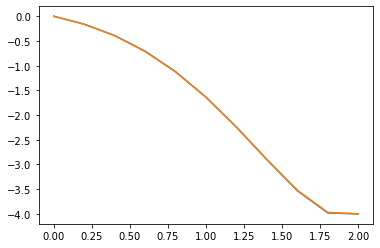

In [61]:
plt.plot(x,y)
plt.plot(x,g(x))